In [4]:
import numpy as np
import pandas as pd

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
ds = pd.read_csv(url, names=names)

In [6]:
ds.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#normalization

list_sl=[]
list_sw=[]
list_pl=[]
list_pw=[]
for sl in ds['sepal length']:
    sl = (sl-min(ds['sepal length']))/(max(ds['sepal length'])-min(ds['sepal length']))
    list_sl.append(sl)
for sw in ds['sepal width']:
    sw = (sw-min(ds['sepal width']))/(max(ds['sepal width'])-min(ds['sepal width']))
    list_sw.append(sw)    
for pl in ds['petal length']:
    pl = (pl-min(ds['petal length']))/(max(ds['petal length'])-min(ds['petal length']))
    list_pl.append(pl)
for pw in ds['petal width']:
    pw = (pw-min(ds['petal width']))/(max(ds['petal width'])-min(ds['petal width']))
    list_pw.append(pw) 

X = np.array( list(zip(list_sl,list_sw, list_pl, list_pw)) )

In [8]:
print (X)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [9]:
nc = 3         # number of classes
W = []         # list for w vectors
M = len(X)     # number of x vectors
N = len(X[0])  # dimensionality of x vectors

In [10]:
def get_weights():
    y = np.random.random() * (2.0 / np.sqrt(M))
    return 0.5 - (1 / np.sqrt(M)) + y

In [11]:
for i in range(nc):
    W.append(list())
    for j in range(N):
        W[i].append(get_weights() * 0.5)

In [12]:
def distance(w, x):
    r = 0
    for i in range(len(w)):
        r = r + (w[i] - x[i])*(w[i] - x[i])
    
    r = np.sqrt(r)
    return r

In [13]:
def Findclosest(W, x):
    wm = W[0]
    r = distance(wm, x)
    
    i = 0
    i_n = i
    
    for w in W:
        if distance(w, x) < r:
            r = distance(w, x)
            wm = w
            i_n = i
        i = i + 1
    
    return (wm, i_n)

In [14]:
print(W)

[[0.2590939627658785, 0.24770748788419242, 0.2274283895308377, 0.2471052660109267], [0.2836912080717359, 0.22017924530150976, 0.24024173027783446, 0.26903788672693885], [0.250526739476882, 0.27007001916842077, 0.24628092778895194, 0.2881868793354074]]


In [15]:
la = 0.3    
dla = 0.05 

while la >= 0:
    for k in range(10):
        for x in X:
            wm = Findclosest(W, x)[0]
            for i in range(len(wm)):
                wm[i] = wm[i] + la * (x[i] - wm[i]) 

    la = la - dla

In [16]:
Data = list() 

for i in range(len(W)):
    Data.append(list())

dfList = ds['class'].as_matrix()

C:\Users\Illia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [55]:
DS = list()
i = 0
for x in X:
    i_n = Findclosest(W, x)[1]
    Data[i_n].append(x)
    DS.append([i_n, dfList[i]])
    i = i + 1

error_num = 0
for small_list in DS:
    if small_list[0] == 0 and small_list[1] != 'Iris-setosa' or small_list[0] == 1 and small_list[1] != 'Iris-versicolor' \
    or small_list[0] == 2 and small_list[1] != 'Iris-virginica':
        error_num += 1

print("Error = {} {}".format((error_num * 100 // len(DS)), "%"))
print(DS)

Error = 12 %
[[0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'Iris-setosa'], [0, 'I

C:\Users\Illia\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Illia\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you us

(500, 32, 32, 3)
(500, 10)
(64, 32, 32, 3)
(64, 10)
Current Iter:  0  Current Train Index:  0  Current SUM of updated Values:  1270794.8
-----------------------
Current Iter:  1  Current Train Index:  0  Current SUM of updated Values:  1240551.4
-----------------------
Current Iter:  2  Current Train Index:  0  Current SUM of updated Values:  1251890.2
-----------------------
Current Iter:  3  Current Train Index:  0  Current SUM of updated Values:  1269896.9
-----------------------
Current Iter:  4  Current Train Index:  0  Current SUM of updated Values:  1273587.4
-----------------------
Current Iter:  5  Current Train Index:  0  Current SUM of updated Values:  1276764.5
-----------------------
Current Iter:  6  Current Train Index:  0  Current SUM of updated Values:  1285215.2
-----------------------
Current Iter:  7  Current Train Index:  0  Current SUM of updated Values:  1284809.4
-----------------------
Current Iter:  8  Current Train Index:  0  Current SUM of updated Values:  1

Current Iter:  76  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current Iter:  77  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current Iter:  78  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current Iter:  79  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current Iter:  80  Current Train Index:  0  Current SUM of updated Values:  1287222.4
-----------------------
Current Iter:  81  Current Train Index:  0  Current SUM of updated Values:  1287222.4
-----------------------
Current Iter:  82  Current Train Index:  0  Current SUM of updated Values:  1287222.4
-----------------------
Current Iter:  83  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current Iter:  84  Current Train Index:  0  Current SUM of updated Values:  1287222.2
-----------------------
Current It

Current Iter:  151  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  152  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  153  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  154  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  155  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  156  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  157  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  158  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  159  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
C

Current Iter:  226  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  227  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  228  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  229  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  230  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  231  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  232  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  233  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  234  Current Train Index:  0  Current SUM of updated Values:  1287221.9
-----------------------
C

Current Iter:  301  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  302  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  303  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  304  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  305  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  306  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  307  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  308  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  309  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
C

Current Iter:  376  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  377  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  378  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  379  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  380  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  381  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  382  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  383  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  384  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
C

Current Iter:  450  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  451  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  452  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  453  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  454  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  455  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  456  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  457  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  458  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
C

Current Iter:  524  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  525  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  526  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  527  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  528  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  529  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  530  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  531  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  532  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
C

Current Iter:  598  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  599  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  600  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  601  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  602  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  603  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  604  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  605  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  606  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
C

Current Iter:  673  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  674  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  675  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  676  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  677  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  678  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  679  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  680  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  681  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
C

Current Iter:  748  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  749  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  750  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  751  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  752  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  753  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  754  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  755  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  756  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
C

Current Iter:  822  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  823  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  824  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  825  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  826  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  827  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  828  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  829  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  830  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
C

Current Iter:  896  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  897  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  898  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  899  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  900  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  901  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  902  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  903  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
Current Iter:  904  Current Train Index:  0  Current SUM of updated Values:  1287221.5
-----------------------
C

Current Iter:  971  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  972  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  973  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  974  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  975  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  976  Current Train Index:  0  Current SUM of updated Values:  1287221.6
-----------------------
Current Iter:  977  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  978  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
Current Iter:  979  Current Train Index:  0  Current SUM of updated Values:  1287221.8
-----------------------
C

Current Iter:  1045  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1046  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1047  Current Train Index:  0  Current SUM of updated Values:  1287221.4
-----------------------
Current Iter:  1048  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1049  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1050  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1051  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1052  Current Train Index:  0  Current SUM of updated Values:  1287221.2
-----------------------
Current Iter:  1053  Current Train Index:  0  Current SUM of updated Values:  1287221.4
----------------

Current Iter:  1119  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1120  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1121  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1122  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1123  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1124  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1125  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1126  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1127  Current Train Index:  0  Current SUM of updated Values:  1287220.9
----------------

Current Iter:  1195  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1196  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1197  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1198  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1199  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1200  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1201  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1202  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1203  Current Train Index:  0  Current SUM of updated Values:  1287220.6
----------------

Current Iter:  1270  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1271  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1272  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1273  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1274  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1275  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1276  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1277  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1278  Current Train Index:  0  Current SUM of updated Values:  1287220.5
----------------

Current Iter:  1345  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1346  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1347  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1348  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1349  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1350  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1351  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1352  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1353  Current Train Index:  0  Current SUM of updated Values:  1287220.9
----------------

Current Iter:  1419  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1420  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1421  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1422  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1423  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1424  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1425  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1426  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1427  Current Train Index:  0  Current SUM of updated Values:  1287220.4
----------------

Current Iter:  1493  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1494  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1495  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1496  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1497  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1498  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1499  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1500  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1501  Current Train Index:  0  Current SUM of updated Values:  1287220.9
----------------

Current Iter:  1567  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1568  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1569  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1570  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1571  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1572  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1573  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1574  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1575  Current Train Index:  0  Current SUM of updated Values:  1287221.2
----------------

Current Iter:  1641  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1642  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1643  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1644  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1645  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1646  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1647  Current Train Index:  0  Current SUM of updated Values:  1287221.1
-----------------------
Current Iter:  1648  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1649  Current Train Index:  0  Current SUM of updated Values:  1287221.0
----------------

Current Iter:  1715  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1716  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1717  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1718  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1719  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1720  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1721  Current Train Index:  0  Current SUM of updated Values:  1287221.0
-----------------------
Current Iter:  1722  Current Train Index:  0  Current SUM of updated Values:  1287220.9
-----------------------
Current Iter:  1723  Current Train Index:  0  Current SUM of updated Values:  1287221.0
----------------

Current Iter:  1790  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1791  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1792  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1793  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1794  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1795  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1796  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1797  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1798  Current Train Index:  0  Current SUM of updated Values:  1287220.4
----------------

Current Iter:  1865  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1866  Current Train Index:  0  Current SUM of updated Values:  1287220.6
-----------------------
Current Iter:  1867  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1868  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1869  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  1870  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1871  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  1872  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  1873  Current Train Index:  0  Current SUM of updated Values:  1287220.4
----------------

Current Iter:  1939  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1940  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1941  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1942  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1943  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1944  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1945  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1946  Current Train Index:  0  Current SUM of updated Values:  1287220.8
-----------------------
Current Iter:  1947  Current Train Index:  0  Current SUM of updated Values:  1287220.8
----------------

Current Iter:  2014  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2015  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2016  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2017  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2018  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2019  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  2020  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2021  Current Train Index:  0  Current SUM of updated Values:  1287220.5
-----------------------
Current Iter:  2022  Current Train Index:  0  Current SUM of updated Values:  1287220.4
----------------

Current Iter:  2088  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2089  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2090  Current Train Index:  0  Current SUM of updated Values:  1287220.4
-----------------------
Current Iter:  2091  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2092  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2093  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  2094  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2095  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2096  Current Train Index:  0  Current SUM of updated Values:  1287220.2
----------------

Current Iter:  2162  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2163  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2164  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2165  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2166  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2167  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2168  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2169  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2170  Current Train Index:  0  Current SUM of updated Values:  1287219.9
----------------

Current Iter:  2237  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2238  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2239  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2240  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2241  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2242  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2243  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2244  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2245  Current Train Index:  0  Current SUM of updated Values:  1287220.0
----------------

Current Iter:  2311  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2312  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2313  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2314  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2315  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2316  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2317  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2318  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2319  Current Train Index:  0  Current SUM of updated Values:  1287219.9
----------------

Current Iter:  2386  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2387  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2388  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2389  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2390  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2391  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2392  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2393  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  2394  Current Train Index:  0  Current SUM of updated Values:  1287220.1
----------------

Current Iter:  2460  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2461  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2462  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2463  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  2464  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2465  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2466  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2467  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2468  Current Train Index:  0  Current SUM of updated Values:  1287219.9
----------------

Current Iter:  2536  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2537  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2538  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2539  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2540  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2541  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2542  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2543  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2544  Current Train Index:  0  Current SUM of updated Values:  1287219.6
----------------

Current Iter:  2610  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2611  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2612  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2613  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  2614  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2615  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2616  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  2617  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2618  Current Train Index:  0  Current SUM of updated Values:  1287219.8
----------------

Current Iter:  2684  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2685  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2686  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2687  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2688  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2689  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2690  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2691  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2692  Current Train Index:  0  Current SUM of updated Values:  1287219.4
----------------

Current Iter:  2758  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2759  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  2760  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  2761  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2762  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2763  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2764  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2765  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  2766  Current Train Index:  0  Current SUM of updated Values:  1287219.1
----------------

Current Iter:  2832  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2833  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2834  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2835  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2836  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2837  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  2838  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2839  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2840  Current Train Index:  0  Current SUM of updated Values:  1287219.2
----------------

Current Iter:  2907  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2908  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2909  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2910  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2911  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2912  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  2913  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2914  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2915  Current Train Index:  0  Current SUM of updated Values:  1287219.4
----------------

Current Iter:  2981  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  2982  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  2983  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  2984  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2985  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2986  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2987  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2988  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  2989  Current Train Index:  0  Current SUM of updated Values:  1287219.6
----------------

Current Iter:  3055  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3056  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3057  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3058  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3059  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3060  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3061  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3062  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3063  Current Train Index:  0  Current SUM of updated Values:  1287219.9
----------------

Current Iter:  3130  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3131  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3132  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3133  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3134  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3135  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3136  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3137  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3138  Current Train Index:  0  Current SUM of updated Values:  1287219.5
----------------

Current Iter:  3277  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3278  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3279  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3280  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3281  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3282  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3283  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3284  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3285  Current Train Index:  0  Current SUM of updated Values:  1287219.2
----------------

Current Iter:  3351  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3352  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3353  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3354  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3355  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3356  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3357  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3358  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3359  Current Train Index:  0  Current SUM of updated Values:  1287219.5
----------------

Current Iter:  3425  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3426  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3427  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3428  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3429  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3430  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3431  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3432  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3433  Current Train Index:  0  Current SUM of updated Values:  1287219.8
----------------

Current Iter:  3499  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3500  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3501  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3502  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3503  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3504  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3505  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  3506  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  3507  Current Train Index:  0  Current SUM of updated Values:  1287220.1
----------------

Current Iter:  3574  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3575  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3576  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3577  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3578  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3579  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3580  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3581  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3582  Current Train Index:  0  Current SUM of updated Values:  1287219.4
----------------

Current Iter:  3649  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3650  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3651  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3652  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3653  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3654  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3655  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  3656  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  3657  Current Train Index:  0  Current SUM of updated Values:  1287219.5
----------------

Current Iter:  3724  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  3725  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3726  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3727  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3728  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3729  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3730  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3731  Current Train Index:  0  Current SUM of updated Values:  1287219.1
-----------------------
Current Iter:  3732  Current Train Index:  0  Current SUM of updated Values:  1287219.1
----------------

Current Iter:  3798  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3799  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3800  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3801  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3802  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3803  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3804  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3805  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  3806  Current Train Index:  0  Current SUM of updated Values:  1287218.9
----------------

Current Iter:  3874  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3875  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3876  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3877  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3878  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3879  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3880  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  3881  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  3882  Current Train Index:  0  Current SUM of updated Values:  1287219.6
----------------

Current Iter:  3950  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  3951  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  3952  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  3953  Current Train Index:  0  Current SUM of updated Values:  1287220.2
-----------------------
Current Iter:  3954  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  3955  Current Train Index:  0  Current SUM of updated Values:  1287220.1
-----------------------
Current Iter:  3956  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3957  Current Train Index:  0  Current SUM of updated Values:  1287220.0
-----------------------
Current Iter:  3958  Current Train Index:  0  Current SUM of updated Values:  1287220.0
----------------

Current Iter:  4025  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  4026  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  4027  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  4028  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4029  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4030  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4031  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4032  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4033  Current Train Index:  0  Current SUM of updated Values:  1287219.8
----------------

Current Iter:  4100  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4101  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  4102  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  4103  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  4104  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4105  Current Train Index:  0  Current SUM of updated Values:  1287219.8
-----------------------
Current Iter:  4106  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  4107  Current Train Index:  0  Current SUM of updated Values:  1287219.9
-----------------------
Current Iter:  4108  Current Train Index:  0  Current SUM of updated Values:  1287219.9
----------------

Current Iter:  4175  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  4176  Current Train Index:  0  Current SUM of updated Values:  1287219.6
-----------------------
Current Iter:  4177  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  4178  Current Train Index:  0  Current SUM of updated Values:  1287219.4
-----------------------
Current Iter:  4179  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  4180  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  4181  Current Train Index:  0  Current SUM of updated Values:  1287219.5
-----------------------
Current Iter:  4182  Current Train Index:  0  Current SUM of updated Values:  1287219.2
-----------------------
Current Iter:  4183  Current Train Index:  0  Current SUM of updated Values:  1287219.2
----------------

Current Iter:  4249  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4250  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4251  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4252  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4253  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4254  Current Train Index:  0  Current SUM of updated Values:  1287219.0
-----------------------
Current Iter:  4255  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4256  Current Train Index:  0  Current SUM of updated Values:  1287218.9
-----------------------
Current Iter:  4257  Current Train Index:  0  Current SUM of updated Values:  1287219.0
----------------

Current Iter:  4324  Current Train Index:  0  Current SUM of updated Values:  1287218.6
-----------------------
Current Iter:  4325  Current Train Index:  0  Current SUM of updated Values:  1287218.6
-----------------------
Current Iter:  4326  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4327  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4328  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4329  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4330  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4331  Current Train Index:  0  Current SUM of updated Values:  1287218.8
-----------------------
Current Iter:  4332  Current Train Index:  0  Current SUM of updated Values:  1287218.8
----------------

Current Iter:  4398  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4399  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4400  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4401  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4402  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4403  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4404  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4405  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4406  Current Train Index:  0  Current SUM of updated Values:  1287218.1
----------------

Current Iter:  4473  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4474  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4475  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4476  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4477  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4478  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4479  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4480  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4481  Current Train Index:  0  Current SUM of updated Values:  1287218.2
----------------

Current Iter:  4548  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4549  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4550  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4551  Current Train Index:  0  Current SUM of updated Values:  1287217.9
-----------------------
Current Iter:  4552  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4553  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4554  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4555  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4556  Current Train Index:  0  Current SUM of updated Values:  1287217.9
----------------

Current Iter:  4624  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4625  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4626  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4627  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4628  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4629  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4630  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4631  Current Train Index:  0  Current SUM of updated Values:  1287218.0
-----------------------
Current Iter:  4632  Current Train Index:  0  Current SUM of updated Values:  1287217.9
----------------

Current Iter:  4699  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4700  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4701  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4702  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4703  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4704  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4705  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4706  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4707  Current Train Index:  0  Current SUM of updated Values:  1287218.2
----------------

Current Iter:  4775  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4776  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4777  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4778  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4779  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4780  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4781  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4782  Current Train Index:  0  Current SUM of updated Values:  1287218.1
-----------------------
Current Iter:  4783  Current Train Index:  0  Current SUM of updated Values:  1287218.2
----------------

Current Iter:  4849  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4850  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4851  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4852  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4853  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4854  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4855  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4856  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4857  Current Train Index:  0  Current SUM of updated Values:  1287218.4
----------------

Current Iter:  4924  Current Train Index:  0  Current SUM of updated Values:  1287218.5
-----------------------
Current Iter:  4925  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4926  Current Train Index:  0  Current SUM of updated Values:  1287218.5
-----------------------
Current Iter:  4927  Current Train Index:  0  Current SUM of updated Values:  1287218.4
-----------------------
Current Iter:  4928  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4929  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4930  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4931  Current Train Index:  0  Current SUM of updated Values:  1287218.2
-----------------------
Current Iter:  4932  Current Train Index:  0  Current SUM of updated Values:  1287218.1
----------------

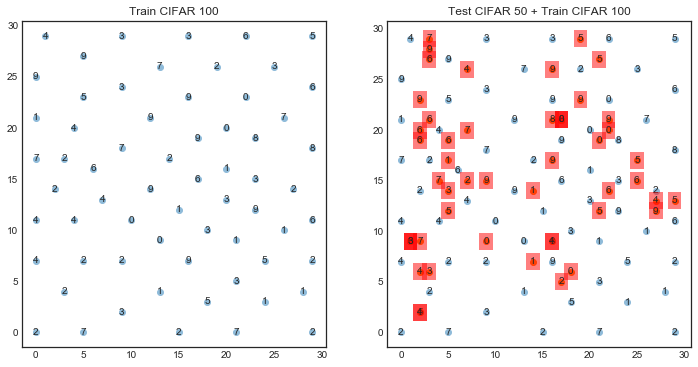

In [3]:
#SOM with CIFAR
#For plotting the images
from matplotlib import pyplot as plt
import sys
import numpy as np
import tensorflow as tf
import numpy as np
import sys, os,cv2
from sklearn.utils import shuffle
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage.transform import resize
from imgaug import augmenters as iaa
import imgaug as ia
from skimage.color import rgba2rgb

old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

plt.style.use('seaborn-white')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
np.random.seed(6278)
tf.set_random_seed(6728)
ia.seed(6278)

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# SOM as layer
class SOM_Layer(): 

    def __init__(self,m,n,dim,learning_rate_som = 0.04,radius_factor = 1.1,gaussian_std=0.5):
        
        self.m = m
        self.n = n
        self.dim = dim
        self.gaussian_std = gaussian_std
        self.map = tf.Variable(tf.random_normal(shape=[m*n,dim],stddev=0.05))
        self.location_vects = tf.constant(np.array(list(self._neuron_locations(m, n))))
        self.alpha = learning_rate_som
        self.sigma = max(m,n)*1.1

    def _neuron_locations(self, m, n):
        """
        Yields one by one the 2-D locations of the individual neurons in the SOM.
        """
        # Nested iterations over both dimensions to generate all 2-D locations in the map
        for i in range(m):
            for j in range(n):
                yield np.array([i, j])

    def getmap(self): return self.map
    def getlocation(self): return self.bmu_locs

    def feedforward(self,input):
    
        self.input = input
        self.squared_distance = tf.reduce_sum(tf.pow(tf.subtract(tf.expand_dims(self.map, axis=0),tf.expand_dims(self.input, axis=1)), 2), 2)
        self.bmu_indices = tf.argmin(self.squared_distance, axis=1)
        self.bmu_locs = tf.reshape(tf.gather(self.location_vects, self.bmu_indices), [-1, 2])

    def backprop(self,iter,num_epoch):

        # Update the weigths 
        radius = tf.subtract(self.sigma,
                                tf.multiply(iter,
                                            tf.divide(tf.cast(tf.subtract(self.alpha, 1),tf.float32),
                                                    tf.cast(tf.subtract(num_epoch, 1),tf.float32))))

        alpha = tf.subtract(self.alpha,
                            tf.multiply(iter,
                                            tf.divide(tf.cast(tf.subtract(self.alpha, 1),tf.float32),
                                                      tf.cast(tf.subtract(num_epoch, 1),tf.float32))))

        self.bmu_distance_squares = tf.reduce_sum(
                tf.pow(tf.subtract(
                    tf.expand_dims(self.location_vects, axis=0),
                    tf.expand_dims(self.bmu_locs, axis=1)), 2), 
            2)

        self.neighbourhood_func = tf.exp(tf.divide(tf.negative(tf.cast(
                self.bmu_distance_squares, "float32")), tf.multiply(
                tf.square(tf.multiply(radius, self.gaussian_std)), 2)))

        self.learning_rate_op = tf.multiply(self.neighbourhood_func, alpha)
        
        self.numerator = tf.reduce_sum(
            tf.multiply(tf.expand_dims(self.learning_rate_op, axis=-1),
            tf.expand_dims(self.input, axis=1)), axis=0)

        self.denominator = tf.expand_dims(
            tf.reduce_sum(self.learning_rate_op,axis=0) + float(1e-20), axis=-1)

        self.new_weights = tf.div(self.numerator, self.denominator)
        self.update = tf.assign(self.map, self.new_weights)

        return self.update

# data
#PathDicom = "../../cifar-10-batches-py/"
PathDicom = "C:/Users/Illia/Anaconda3/Deep Learning/SA/lab5/cifar-10-batches-py/"    

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if not ".html" in filename.lower() and not  ".meta" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

# Read the data traind and Test
batch0 = unpickle(lstFilesDCM[0])
batch1 = unpickle(lstFilesDCM[1])
batch2 = unpickle(lstFilesDCM[2])
batch3 = unpickle(lstFilesDCM[3])
batch4 = unpickle(lstFilesDCM[4])

onehot_encoder = OneHotEncoder(sparse=True)
train_batch = np.vstack((batch0[b'data'],batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data']))
train_label = np.expand_dims(np.hstack((batch0[b'labels'],batch1[b'labels'],batch2[b'labels'],batch3[b'labels'],batch4[b'labels'])).T,axis=1).astype(np.float32)
train_label = onehot_encoder.fit_transform(train_label).toarray().astype(np.float32)

test_batch = unpickle(lstFilesDCM[5])[b'data']
test_label = np.expand_dims(np.array(unpickle(lstFilesDCM[5])[b'labels']),axis=0).T.astype(np.float32)
test_label = onehot_encoder.fit_transform(test_label).toarray().astype(np.float32)

# reshape data
train_batch = np.reshape(train_batch,(len(train_batch),3,32,32))
test_batch = np.reshape(test_batch,(len(test_batch),3,32,32))

# rotate data
train_batch = np.rot90(np.rot90(train_batch,1,axes=(1,3)),3,axes=(1,2)).astype(np.float32)
test_batch = np.rot90(np.rot90(test_batch,1,axes=(1,3)),3,axes=(1,2)).astype(np.float32)

# hyper parameter 10000
num_epoch = 5000#100
batch_size = 64

learning_rate = 0.03#0.000000001
beta1,beta2,adam_e = 0.9,0.999,1e-8

# print out the data shape
train_batch = train_batch[:500,:,:,:]
train_label = train_label[:500,:]
test_batch = test_batch[:batch_size,:,:,:]
test_label = test_label[:batch_size,:]

print(train_batch.shape)
print(train_label.shape)
print(test_batch.shape)
print(test_label.shape)

train_batch = train_batch/255.0
test_batch = test_batch/255.0
train_batch = np.reshape(train_batch,[500,-1])
test_batch = np.reshape(test_batch,[batch_size,-1])

# hyper parameter
map_width_height  = 30
map_dim = 32 * 32 * 3
num_epoch = 5000 #100
batch_size = 64

# class
SOM_layer = SOM_Layer(map_width_height,map_width_height,map_dim,learning_rate_som=0.8,radius_factor=0.4,gaussian_std = 0.03)

# create the graph
x = tf.placeholder(shape=[None,map_dim],dtype=tf.float32)
current_iter = tf.placeholder(shape=[],dtype=tf.float32)

# graph
SOM_layer.feedforward(x)
map_update=SOM_layer.backprop(current_iter,num_epoch)

# session
with tf.Session() as sess: 

    sess.run(tf.global_variables_initializer())

    # start the training
    for iter in range(num_epoch):
        for current_train_index in range(0,len(test_batch),batch_size):
            currren_train = train_batch[current_train_index:current_train_index+batch_size]
            sess_results = sess.run(map_update,feed_dict={x:currren_train,current_iter:iter})
            print('Current Iter: ',iter,' Current Train Index: ',current_train_index,' Current SUM of updated Values: ',sess_results.sum(),end='\r' )
        print('\n-----------------------')

    # after training is done get the cloest vector
    locations = sess.run(SOM_layer.getlocation(),feed_dict={x:train_batch[:batch_size]})
    x1 = locations[:,0]; y1 = locations[:,1]
    index = [ np.where(r==1)[0][0] for r in train_label ]
    index = list(map(str, index))

    ## Plots: 1) Train 2) Test+Train ###
    plt.figure(1, figsize=(12,6))
    plt.subplot(121)
    plt.scatter(x1,y1)
    # Just adding text
    for i, m in enumerate(locations):
        plt.text( m[0], m[1],index[i], ha='center', va='center', 
        bbox=dict(facecolor='white', alpha=0.5, lw=0))
    plt.title('Train CIFAR 100')

    locations2 = sess.run(SOM_layer.getlocation(),feed_dict={x:test_batch})
    locations2 = locations2[:50]
    x2 = locations2[:,0]; y2 = locations2[:,1]
    index2 = [ np.where(r==1)[0][0] for r in test_label ]
    index2 = list(map(str, index2))

    plt.subplot(122)
    # Plot 2: Training + Testing
    plt.scatter(x1,y1)
    # Just adding text
    for i, m in enumerate(locations):
        plt.text( m[0], m[1],index[i], ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, lw=0))

    plt.scatter(x2,y2)
    # Just adding text
    for i, m in enumerate(locations2):
        plt.text( m[0], m[1],index2[i], ha='center', va='center', bbox=dict(facecolor='red', alpha=0.5, lw=0))
    plt.title('Test CIFAR 50 + Train CIFAR 100')
    plt.show()


# -- end code --